In [1]:
# Ungraded Lab: Training with ImageDataGenerator

# Horses or Humans Dataset

In [2]:
# Download the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2023-12-15 12:27:57--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.211.207, 173.194.212.207, 142.251.162.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.211.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M   120MB/s    in 1.2s    

2023-12-15 12:27:58 (120 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [3]:
import zipfile

# Unzip the dataset
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

In [4]:
import os

# Directory with training horse pics
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with training human pics
train_human_dir = os.path.join('./horse-or-human/humans')

In [5]:
# load pictures
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse19-5.png', 'horse39-1.png', 'horse10-6.png', 'horse29-1.png', 'horse19-4.png', 'horse21-8.png', 'horse01-2.png', 'horse38-5.png', 'horse02-7.png', 'horse37-4.png']
['human10-08.png', 'human14-07.png', 'human08-01.png', 'human16-03.png', 'human16-24.png', 'human06-17.png', 'human11-17.png', 'human14-26.png', 'human04-08.png', 'human08-03.png']


In [6]:
# Show total number of horses
print('total training horse images: ',len(os.listdir(train_horse_dir)))
print('total training human images: ',len(os.listdir(train_human_dir)))

total training horse images:  500
total training human images:  527


In [7]:
# Visualize few pictures
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for graph: output images in 4x4 configuration
nrows, ncols = 4, 4

# Index for iterating over images
pic_index = 0

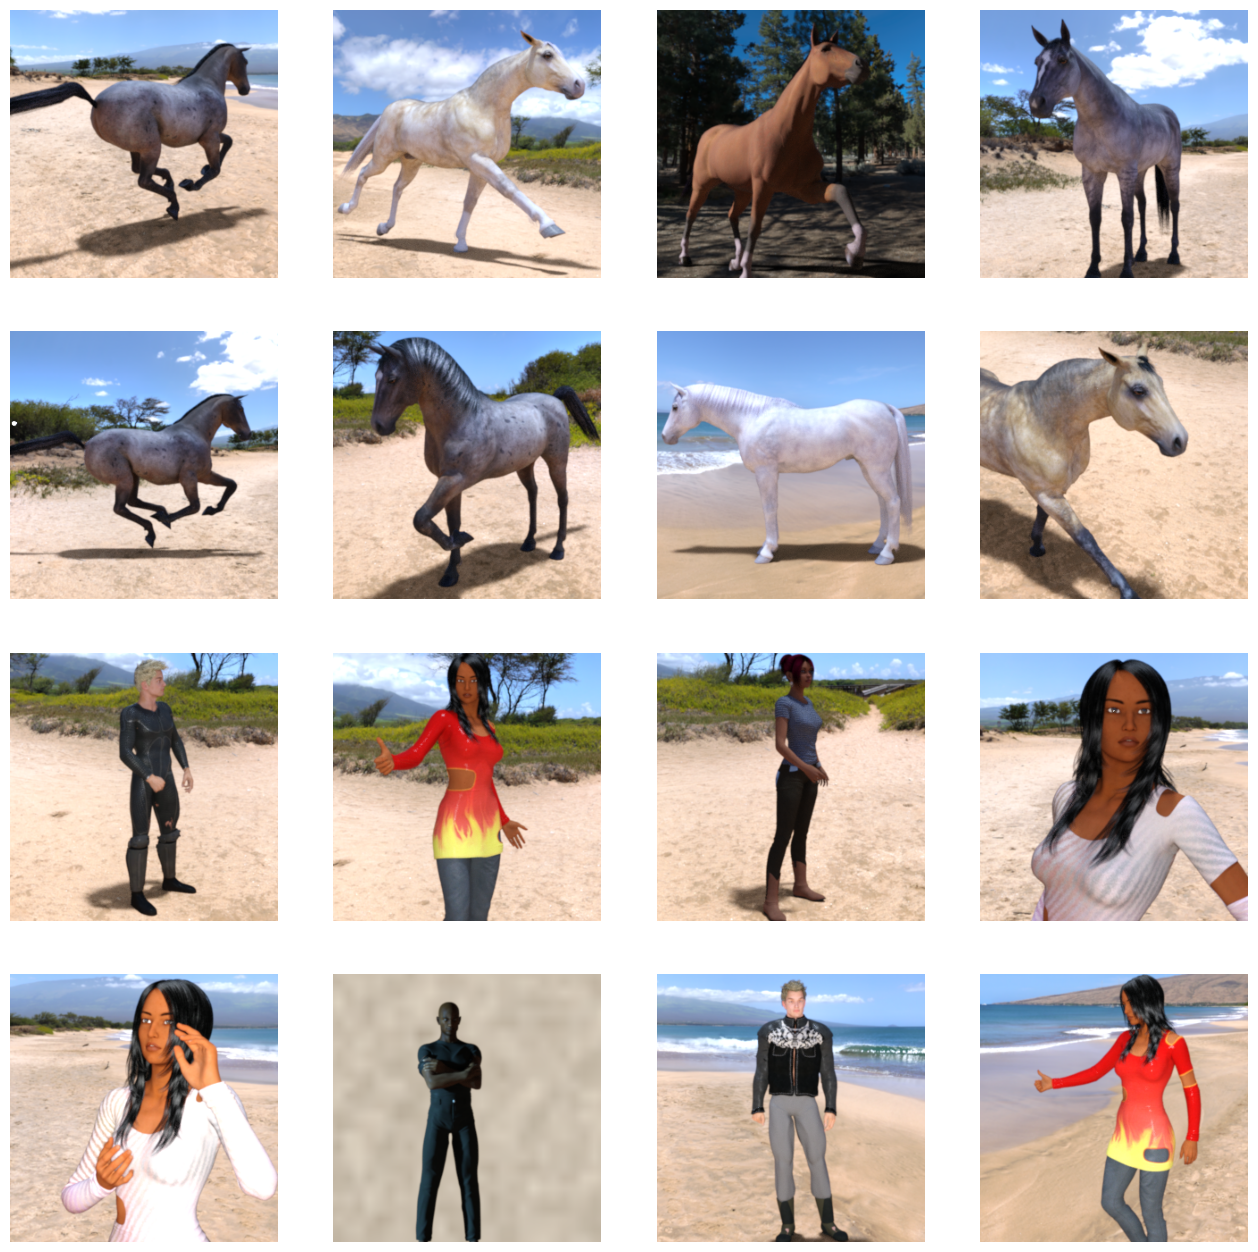

In [8]:
# Display a batch of 8 horse and 8 human pictures

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname)
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname)
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [9]:
# Building a small model from scratch
import tensorflow as tf

In [10]:
# Define the model
model = tf.keras.models.Sequential([
    # convolution 1
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    # convolution 2
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # convolution 3
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # convolution 4
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # convolution 5
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # flatten
    tf.keras.layers.Flatten(),

    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),

    # 1 output
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 64)        0

In [12]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [13]:
# Data preprocessing

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescaling
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training imges batches of 128
train_generator = train_datagen.flow_from_directory(
    './horse-or-human', # source dir for training
    target_size = (300,300), # images resized
    batch_size = 128,
    class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.


In [14]:
# Training
history = model.fit(
    train_generator,
    steps_per_epoch = 8,
    epochs = 15,
    verbose = 1
)

Epoch 1/15
8/8 [==============================] - 106s 12s/step - loss: 0.7339 - accuracy: 0.4861
Epoch 2/15
8/8 [==============================] - 100s 14s/step - loss: 0.6595 - accuracy: 0.5784
Epoch 3/15
8/8 [==============================] - 99s 12s/step - loss: 2.6323 - accuracy: 0.7731
Epoch 4/15
8/8 [==============================] - 107s 13s/step - loss: 0.3183 - accuracy: 0.9121
Epoch 5/15
8/8 [==============================] - 101s 12s/step - loss: 0.3058 - accuracy: 0.8732
Epoch 6/15
8/8 [==============================] - 113s 14s/step - loss: 0.1924 - accuracy: 0.9238
Epoch 7/15
8/8 [==============================] - 103s 12s/step - loss: 0.2524 - accuracy: 0.8988
Epoch 8/15
8/8 [==============================] - 112s 14s/step - loss: 0.1646 - accuracy: 0.9355
Epoch 9/15
8/8 [==============================] - 111s 12s/step - loss: 0.3001 - accuracy: 0.8943
Epoch 10/15
8/8 [==============================] - 102s 12s/step - loss: 0.2536 - accuracy: 0.9110
Epoch 11/15
8/8 [===

In [ ]:
# Prediction

## NOTE: If you are using Safari and this cell throws an error,
## please skip this block and run the next one instead.

import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(300, 300))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])

  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

1/1 [==============================] - 0s 184ms/step


<ipython-input-18-3501e75cf878>:45: RuntimeWarning: invalid value encountered in divide
  x /= x.std()


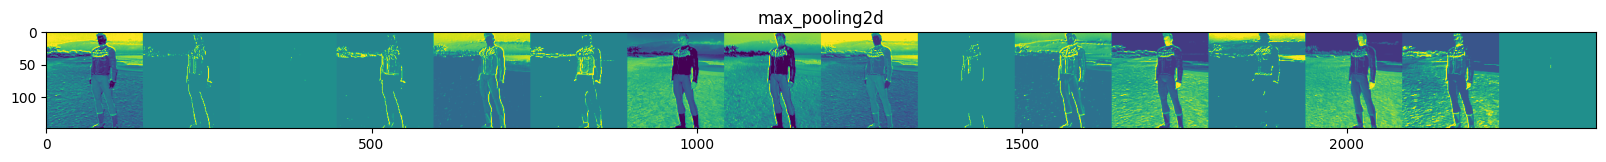

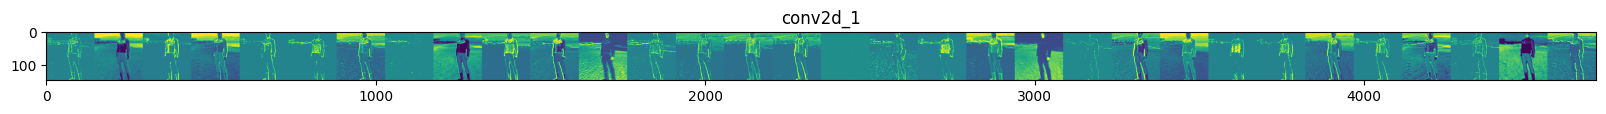

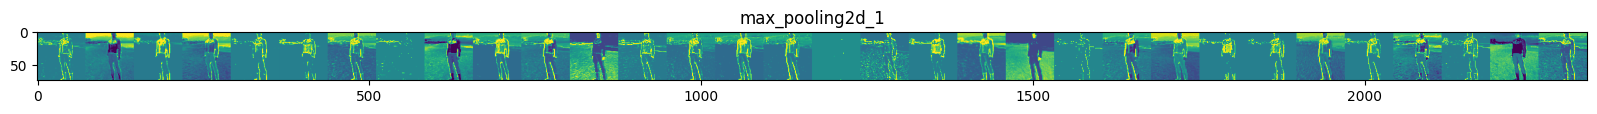

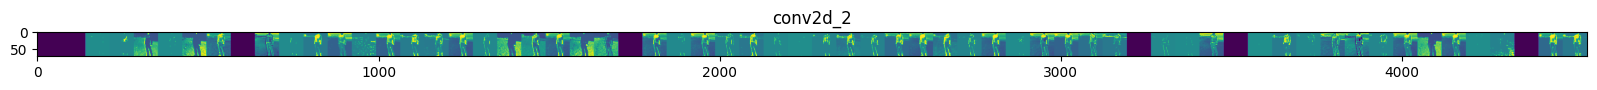

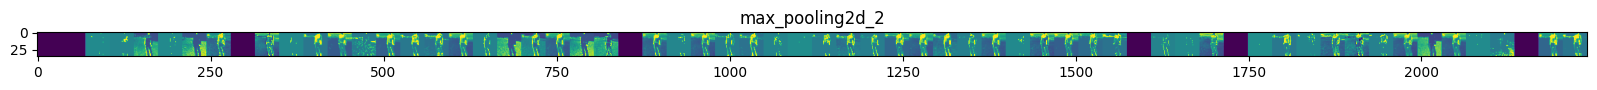

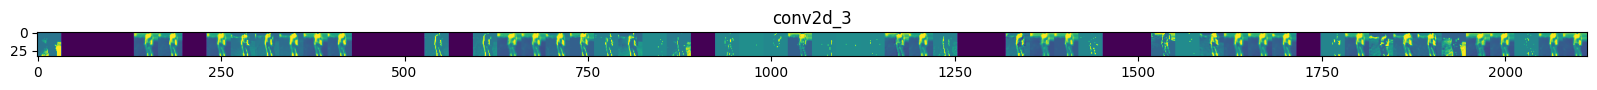

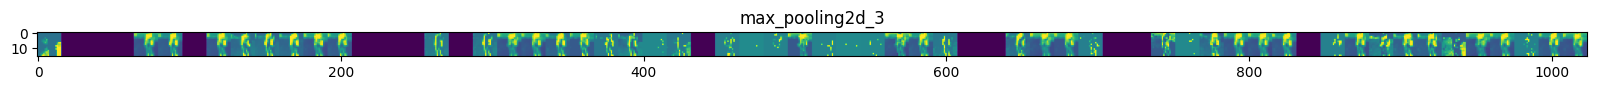

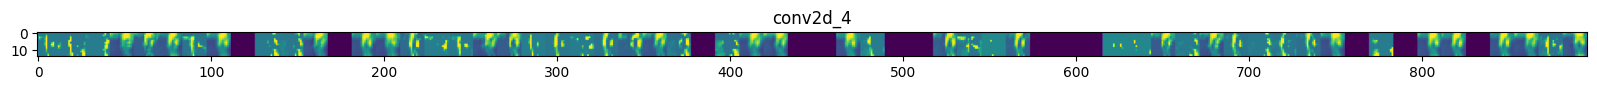

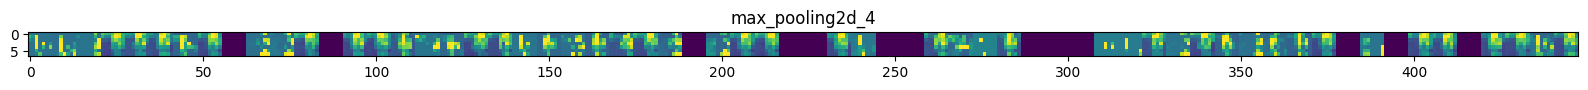

In [18]:
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]

    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')

      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x

    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
# Terminate kernel and free memory resources
from google.colab import runtime
runtime.unassign()